### Solving the Intersection of Two Nonlinear Curves
#### Problem
Find the intersection points of the nonlinear equations:
$$x^2 +y^2=4$$
$$xe^y-1=0$$

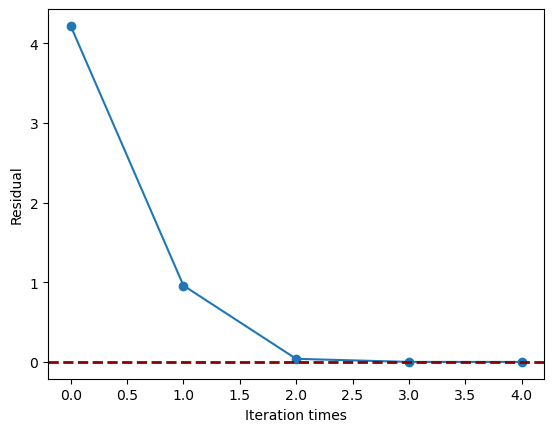

Solution: [0.13596291 1.99537317]
Converged: True, Iterations: 5


In [1]:
import numpy as np
from algorithms.newton_method import NewtonSolver

def func(x):
    return np.array([
        x[0]**2 + x[1]**2 - 4,  # Circle equation
        x[0] * np.exp(x[1]) - 1 # Exponential equation
    ])

def jac(x):
    return np.array([
        [2*x[0], 2*x[1]],        # Derivatives of f1
        [np.exp(x[1]), x[0]*np.exp(x[1])]  # Derivatives of f2
    ])

x0 = np.array([0, 1.0])  # Initial guess
root, info = NewtonSolver(func, x0, jac,plot=True)

print(f"Solution: {root}")
print(f"Converged: {info['converged']}, Iterations: {info['iterations']}")

We can check the plot of two curves to see if the solution is valid

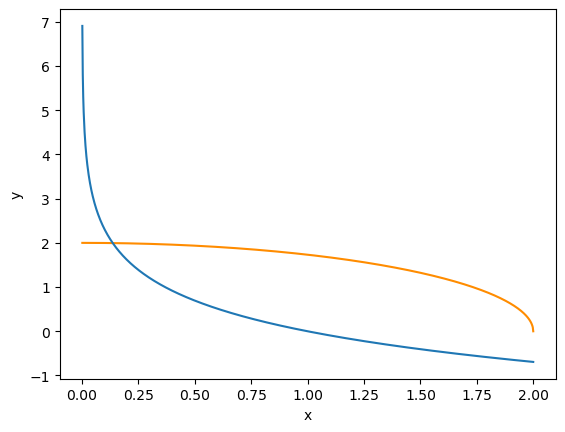

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = np.linspace(1e-3,2,1000)
ax.plot(x, np.sqrt(4-x**2),c='darkorange')
ax.plot(x, np.log(1/x))
ax.set_ylabel('y')
ax.set_xlabel('x')
plt.show()